# Neural models of spoken language: Final assignment

Adapted from: Grzegorz Chrupała and Gaofei Shen

Some of the materials are from [HuggingFace blog post](https://huggingface.co/blog/fine-tune-wav2vec2-english) \
Additional models are from https://github.com/jasonppy/syllable-discovery.

References:

Peng, P., & Harwath, D. (2022). Word Discovery in Visually Grounded, Self-Supervised Speech Models. Interspeech 2022, 2823–2827. https://doi.org/10.21437/Interspeech.2022-10652\
Peng, P., Li, S., Rasanen, O., Mohamed, A., & Harwath, D.F. (2023). Syllable Discovery and Cross-Lingual Generalization in a Visually Grounded, Self-Supervised Speech Model. In Interspeech. https://doi.org/10.21437/Interspeech.2023-2044

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
colab_nb_root_dir = os.path.join(os.getcwd(),'drive/MyDrive/Colab Notebooks/NLP/')

if not os.path.isdir(colab_nb_root_dir):
  os.mkdir(colab_nb_root_dir)

# If you are not using the university Google account, uncomment the following line
# colab_nb_root_dir = os.path.join(os.getcwd(),'NLP/')

if not os.path.isdir(colab_nb_root_dir):
  os.mkdir(colab_nb_root_dir)

os.environ['TRANSFORMERS_CACHE'] = '/content/drive/MyDrive/Colab Notebooks/NLP/HuggingfaceCache'
# os.environ['HF_DATASETS_CACHE'] = '/content/drive/MyDrive/Colab Notebooks/NLP/HuggingfaceCache/Datasets'

In [3]:
#@title Download the TIMIT dataset to your Google Drive
%%capture
!wget -nc -O "/content/drive/MyDrive/Colab Notebooks/NLP/timit.tar" 'https://filesender.surf.nl/download.php?token=a6706f9a-c57f-496a-bda4-d8d580ad7f7b&files_ids=19900522'
!cp "/content/drive/MyDrive/Colab Notebooks/NLP/timit.tar" .
!tar -xf timit.tar

In [4]:
#@title We need to download and load a few python libraries to make our code work
%%capture
%cd /content
!pip install -U datasets

from utils import saving_phoneme_representations, generating_classifier_input, classification, plotting_results, phoneme_to_ipa, visualize_phoneme_distribution, timit
from datasets import load_dataset
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'


# What are we doing here?

The wav2vec2-base model has 12 transformer layers and the 'hidden-state output' are the internal representations of the input data from the pre-trained speech language model. The function `saving_phoneme_representations()` feeds the audio files from the TIMIT dataset through speech language models such as wav2vec2-base and saves the hidden-state outputs of the model of each audio file.

Conveniently, the TIMIT dataset has a phoneme-level alignment in the format of `[start_sample:stop_sample]`. With this phoneme alignment, we can "slice" the hidden-state output into vectors that each corresponds to one phoneme. Through the process we also filter out hidden-state output that corresponds to silence (annotated as `h#`).

After obtaining phoneme representations, we can investigate how good the models are at encoding English phonemes by comparing the accuracy of a simple linear classification paradigm (`PhonemeClassifier`) that classifies each phoneme vectors into their corresponding labels. We train the phoneme classifier with the correctly formatted input and labels by calling function `classification()`.

Lastly, after finishing training our phoneme classifier, we can plot the results with the function `plotting_results()`.

This kind of simple classification paradigm is quite useful for **model interpretability**, because we can use the classifier to "probe" the internal representations of the machine learning/AI models. Here we can see that the hidden-state output of layers 8-10 are the best inputs for our rudimentary phoneme classifier. Indicating that perhaps phoneme identity information is encoded more towards the deeper layers of the wav2vec2 model.

Similarly, the same technique could be applied for linguistic features such as syntax, semantics and finer-grained phonetic features, etc. [1]

[1] Pasad, A., Chou, J.-C., & Livescu, K. (2021). Layer-wise Analysis of a Self-supervised Speech Representation Model (arXiv:2107.04734; Version 2). arXiv. http://arxiv.org/abs/2107.04734

Example classification accuracy results with facebook/wav2vec2-base
![Example results with facebook/wav2vec2-base](https://drive.google.com/uc?export=view&id=1k2VGH2Fd0t0BKe6I5MROfZK88ac12Ezg)

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:365: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()


/content/drive/MyDrive/Colab Notebooks/NLP/facebook-wav2vec2-base_timit-test_phoneme-representations.pt exists already! loading it instead of generating a new one


Layers:   0%|          | 0/13 [00:00<?, ?it/s]

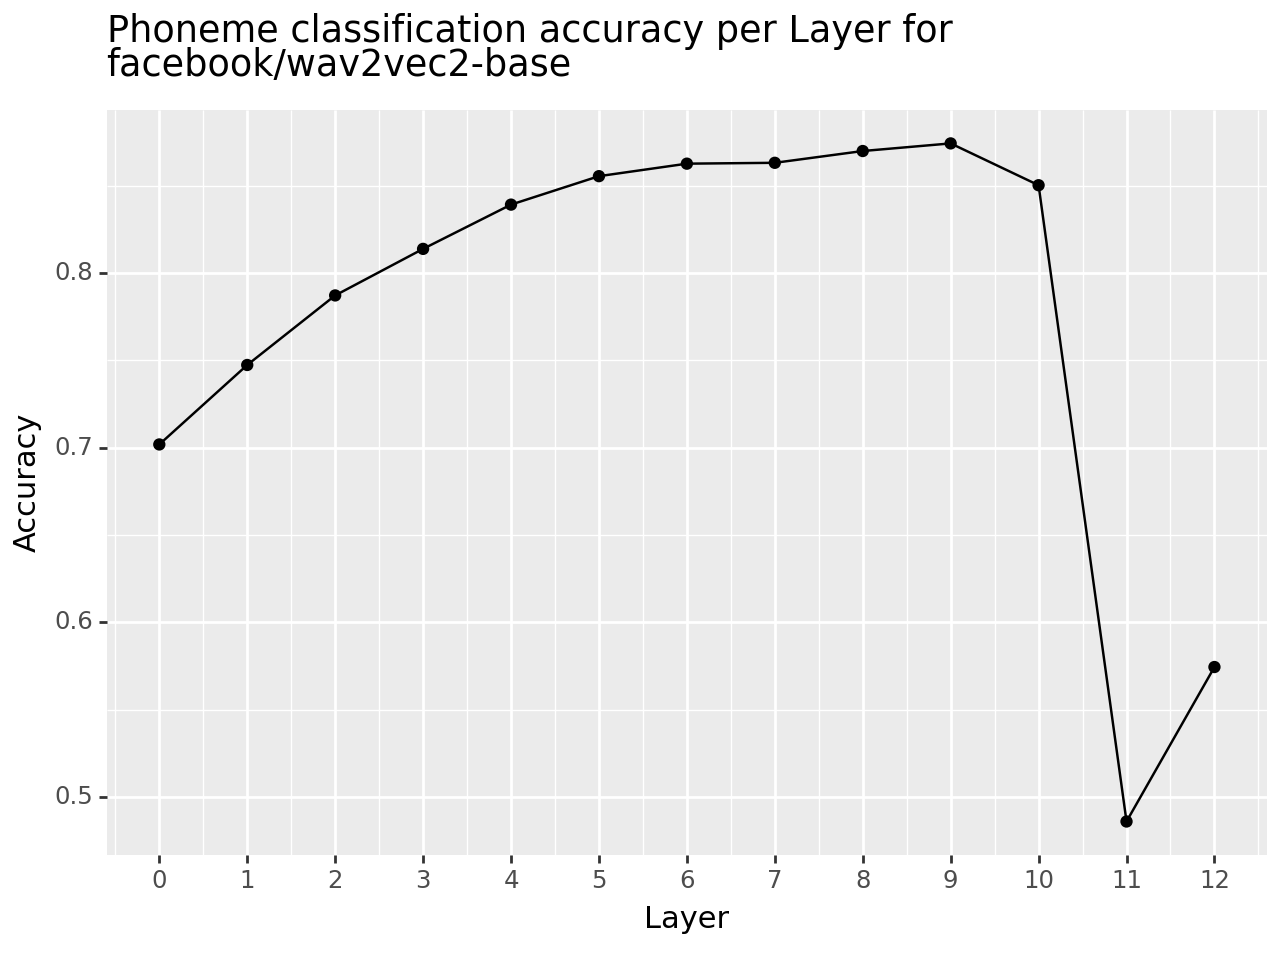

<Figure Size: (640 x 480)>

In [ ]:
#@title Demo Experiment Code

# Name of the model
model_name = "facebook/wav2vec2-base"

# Generate the phoneme representations
timit_test_phoneme_representations = saving_phoneme_representations(model_name = model_name,
                                                                    overwrite = False,
                                                                    split = 'test',
                                                                    save_dir = '/content/drive/MyDrive/Colab Notebooks/NLP/')

# Format the phoneme representations into classifier input
timit_test_classifier_input = generating_classifier_input(timit_test_phoneme_representations, overwrite = False)

# Run classification
results = classification(timit_test_classifier_input)

# Plot the results
plotting_results(results, model_name)

### Distribution of phonemes in TIMIT test split.


In [5]:
# Get the length of the test split
test_data_length = len(timit['test'])

print("Length of the test data split:", test_data_length)

Length of the test data split: 1680


### Running the phoneme classification experiment on Spanish pre-trained speech language model:

config.json:   0%|          | 0.00/2.31k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/380M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()


/content/drive/MyDrive/Colab Notebooks/NLP/facebook-wav2vec2-base-es-voxpopuli-v2_timit-test_phoneme-representations.pt exists already! loading it instead of generating a new one


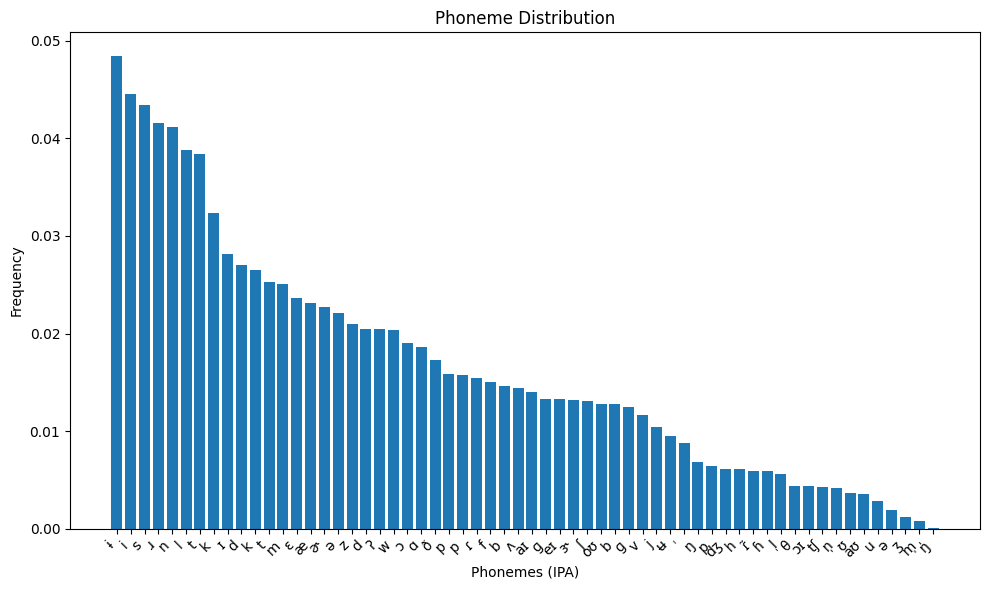

In [6]:
# Name of the model
model_name = "facebook/wav2vec2-base-es-voxpopuli-v2"

# Generate the phoneme representations
timit_test_phoneme_representations = saving_phoneme_representations(model_name = model_name,
                                                                    overwrite = False,
                                                                    split = 'test',
                                                                    save_dir = '/content/drive/MyDrive/Colab Notebooks/NLP/')

# Visualizing phoneme distribution in dataset
visualize_phoneme_distribution(timit_test_phoneme_representations, phoneme_to_ipa)



Layers:   0%|          | 0/13 [00:00<?, ?it/s]

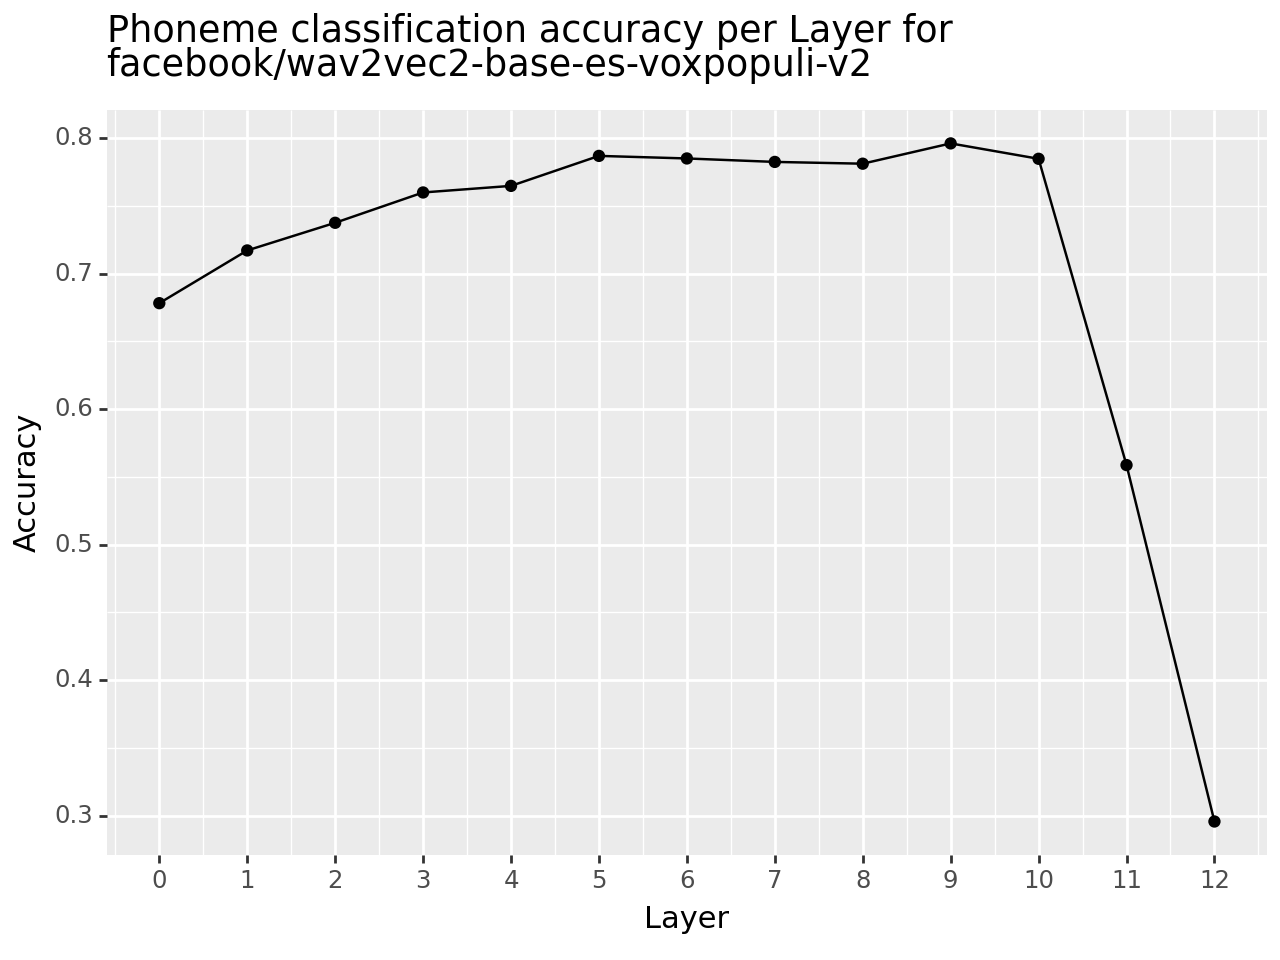

<Figure Size: (640 x 480)>

In [7]:
# Format the phoneme representations into classifier input
timit_test_classifier_input = generating_classifier_input(timit_test_phoneme_representations, overwrite = False)

# Run classification
results = classification(timit_test_classifier_input)

# Plot the results
plotting_results(results, model_name)


In [8]:
for item in results:
  print(item)

{'layer': 0, 'acc_score': 0.6781278275890433, 'f1_score': 0.6701009008396294}
{'layer': 1, 'acc_score': 0.7170354528255326, 'f1_score': 0.7108472197186373}
{'layer': 2, 'acc_score': 0.7374352225055524, 'f1_score': 0.7291237883210013}
{'layer': 3, 'acc_score': 0.7598091634449289, 'f1_score': 0.7541288909468403}
{'layer': 4, 'acc_score': 0.7646623344575142, 'f1_score': 0.7590798941511561}
{'layer': 5, 'acc_score': 0.7867895039894711, 'f1_score': 0.782169496500846}
{'layer': 6, 'acc_score': 0.7848975898659208, 'f1_score': 0.7817086055738359}
{'layer': 7, 'acc_score': 0.7823476186559184, 'f1_score': 0.7788378947410672}
{'layer': 8, 'acc_score': 0.781031504483014, 'f1_score': 0.7773947311223659}
{'layer': 9, 'acc_score': 0.7960023031998026, 'f1_score': 0.7932345608832029}
{'layer': 10, 'acc_score': 0.7846508184585013, 'f1_score': 0.7804011408764108}
{'layer': 11, 'acc_score': 0.55869046639796, 'f1_score': 0.5103644863022896}
{'layer': 12, 'acc_score': 0.2957144032244797, 'f1_score': 0.21213

### Running the phoneme classification experiment on Dutch pre-trained speech language model:

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()


  0%|          | 0/1680 [00:00<?, ?it/s]

Layers:   0%|          | 0/13 [00:00<?, ?it/s]

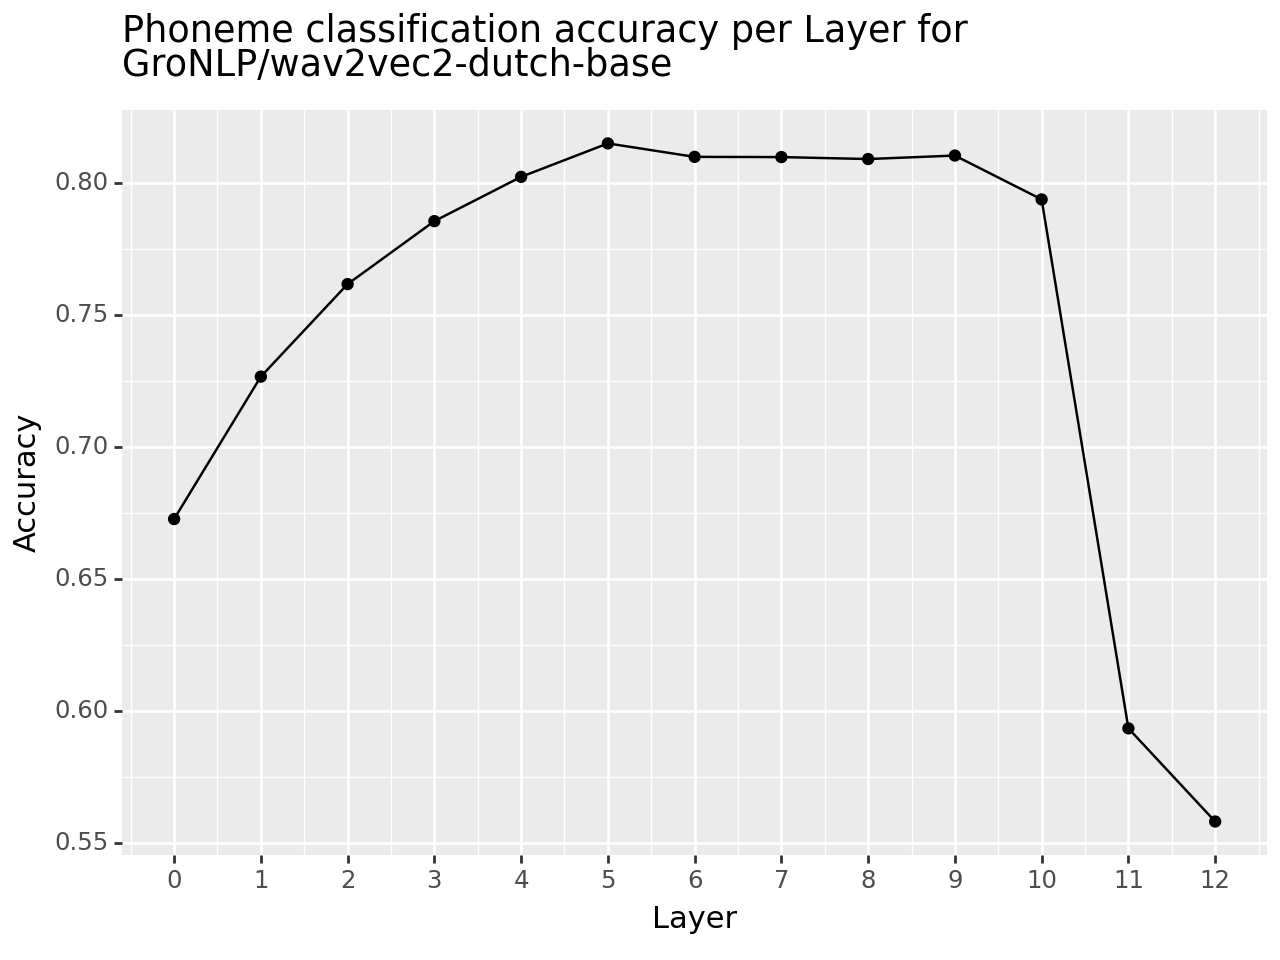

<Figure Size: (640 x 480)>

In [6]:
# Name of the model
model_name = "GroNLP/wav2vec2-dutch-base"

# Generate the phoneme representations
timit_test_phoneme_representations = saving_phoneme_representations(model_name = model_name,
                                                                    overwrite = False,
                                                                    split = 'test',
                                                                    save_dir = '/content/drive/MyDrive/Colab Notebooks/NLP/')

# Format the phoneme representations into classifier input
timit_test_classifier_input = generating_classifier_input(timit_test_phoneme_representations, overwrite = False)

# Run classification
results = classification(timit_test_classifier_input)

# Plot the results
plotting_results(results, model_name)


In [7]:
for item in results:
  print(item)

{'layer': 0, 'acc_score': 0.6727811137616189, 'f1_score': 0.6651856070227266}
{'layer': 1, 'acc_score': 0.7267417948507033, 'f1_score': 0.7207589085183522}
{'layer': 2, 'acc_score': 0.7617833347042856, 'f1_score': 0.7563238057072038}
{'layer': 3, 'acc_score': 0.7856379040881797, 'f1_score': 0.7814487235912976}
{'layer': 4, 'acc_score': 0.802418359792712, 'f1_score': 0.7987647184986195}
{'layer': 5, 'acc_score': 0.8150859587069178, 'f1_score': 0.8120719074632177}
{'layer': 6, 'acc_score': 0.8099860162869129, 'f1_score': 0.8068520321065815}
{'layer': 7, 'acc_score': 0.8099037591511064, 'f1_score': 0.806983362550922}
{'layer': 8, 'acc_score': 0.8091634449288476, 'f1_score': 0.8061727830782971}
{'layer': 9, 'acc_score': 0.8104795591017521, 'f1_score': 0.8071661928254757}
{'layer': 10, 'acc_score': 0.7938636176688327, 'f1_score': 0.7896139039746704}
{'layer': 11, 'acc_score': 0.5934852348441227, 'f1_score': 0.5670829923940298}
{'layer': 12, 'acc_score': 0.5581969235831208, 'f1_score': 0.527

# If you want to remove all the files generated and saved to your Google Drive by this Colab Notebook

Simply go to your Google Drive and delete the folder named "NLP" under "Colab Notebooks"